# Implementation of training process

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dir_name_train_cloudy = 'dataset/train/cloudy'
dir_name_train_rain = 'dataset/train/rain'
dir_name_train_shine = 'dataset/train/shine'
dir_name_train_sunrise = 'dataset/train/sunrise'

In [5]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(35, 10))
    for idx, img_path in enumerate(item_files):
        plt.subplot(2, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [6]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Training data for Cloudy images:

 ====== Images in:  dataset/train/cloudy
images_count:	300
min_width:	183
max_width:	2000
min_height:	134
max_height:	2000



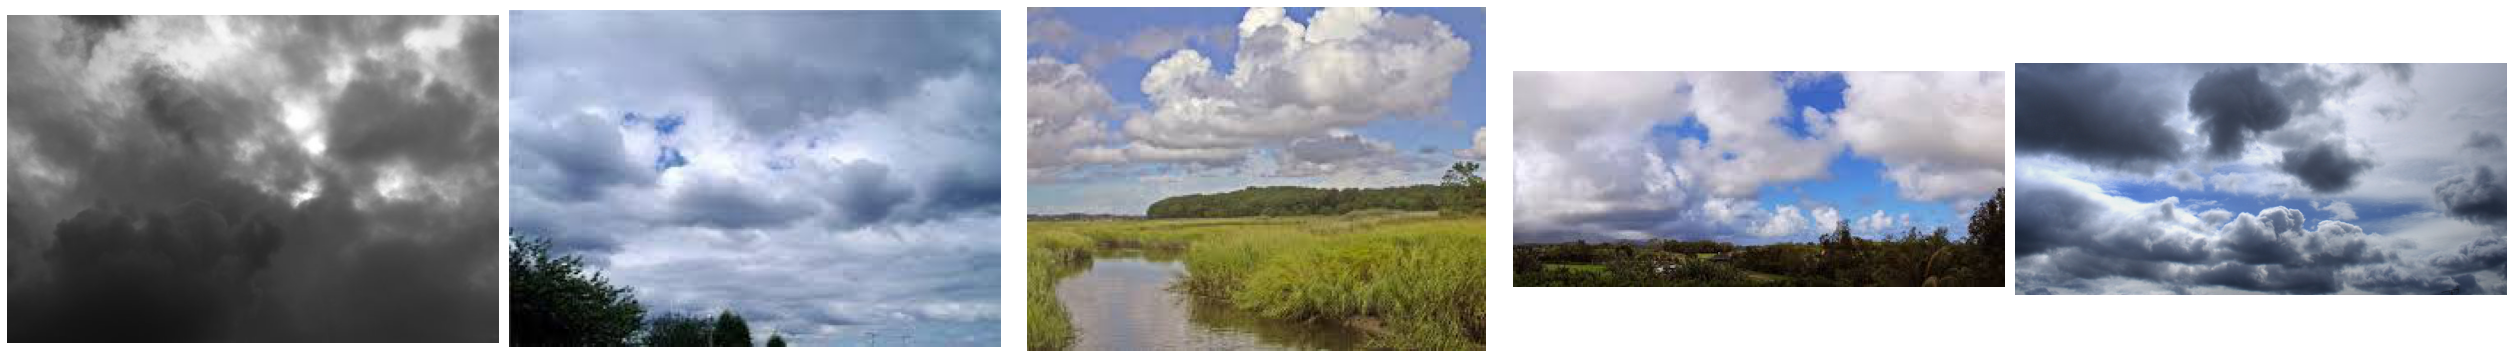

In [7]:

print("")
print("Training data for Cloudy images:")
print("")
Images_details(dir_name_train_cloudy)
print("")
plot_images(dir_name_train_cloudy, 5)


Training data for Rainy images:

 ====== Images in:  dataset/train/rain
images_count:	215
min_width:	183
max_width:	2848
min_height:	158
max_height:	2848



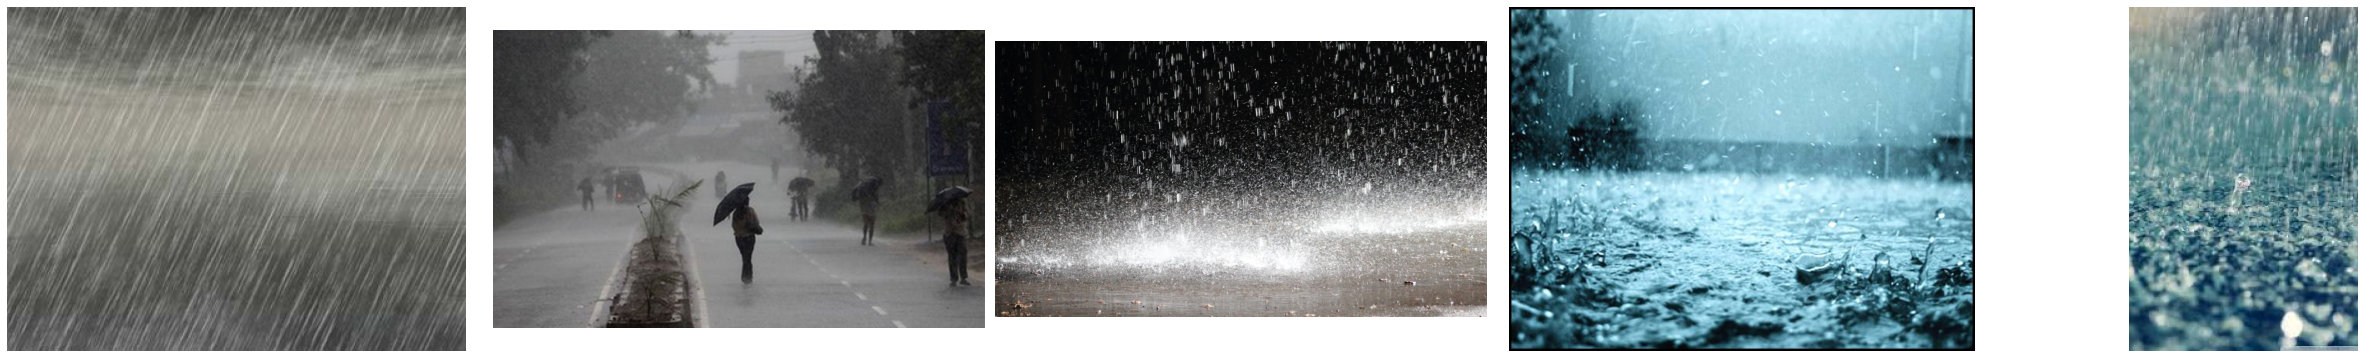

In [8]:
print("")
print("Training data for Rainy images:")
print("")
Images_details(dir_name_train_rain)
print("")
plot_images(dir_name_train_rain, 5)


Training data for Shine images:

 ====== Images in:  dataset/train/shine
images_count:	253
min_width:	158
max_width:	1800
min_height:	111
max_height:	1800



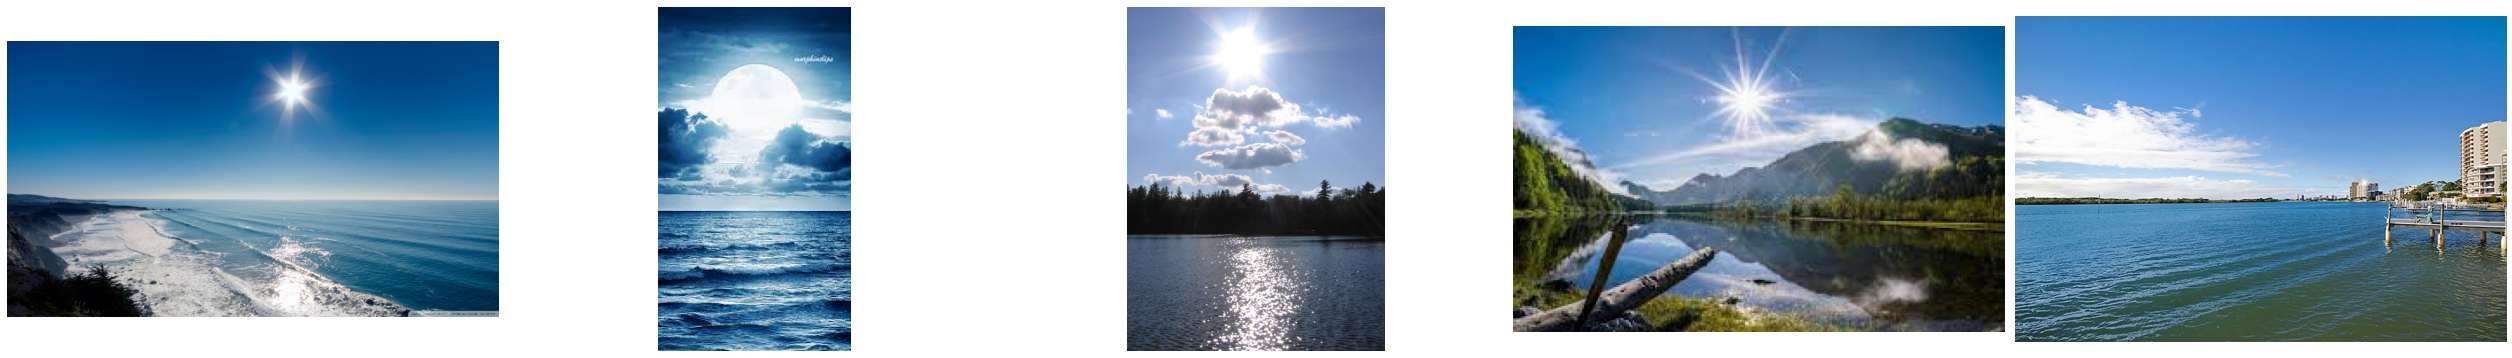

In [9]:
print("")
print("Training data for Shine images:")
print("")
Images_details(dir_name_train_shine)
print("")
plot_images(dir_name_train_shine, 5)


Training data for Sunrise images:

 ====== Images in:  dataset/train/sunrise
images_count:	357
min_width:	190
max_width:	3195
min_height:	94
max_height:	3195



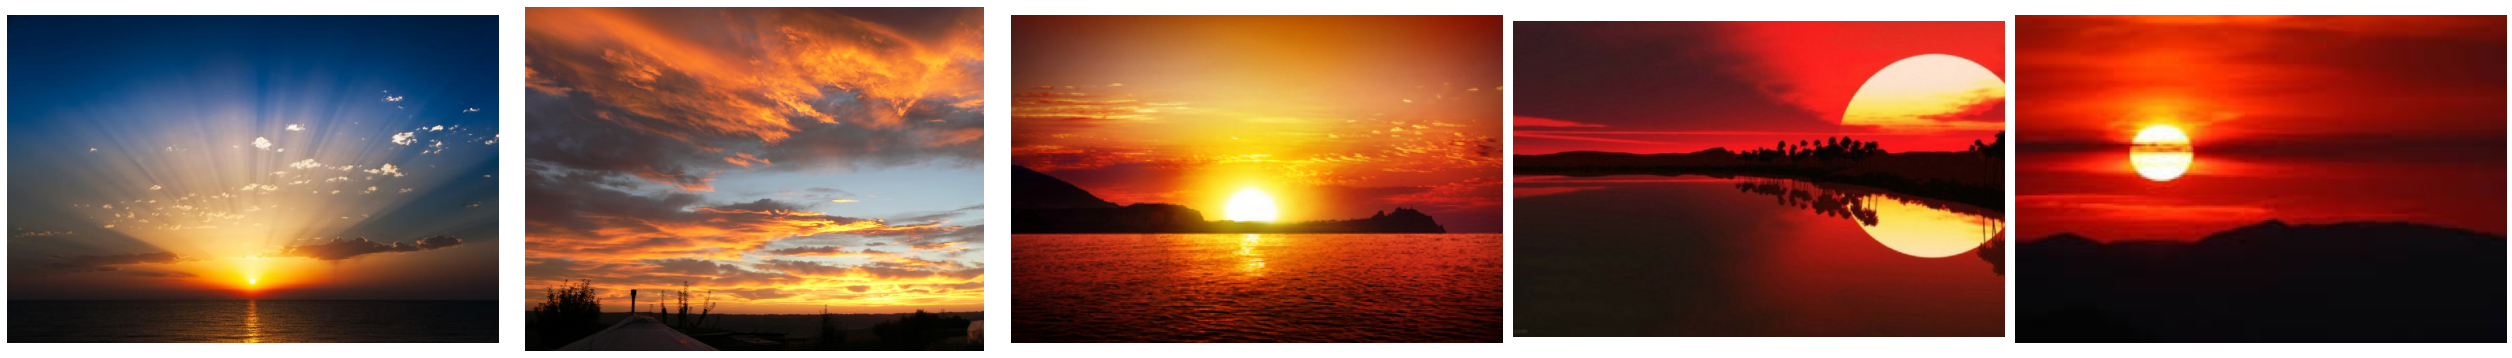

In [10]:
print("")
print("Training data for Sunrise images:")
print("")
Images_details(dir_name_train_sunrise)
print("")
plot_images(dir_name_train_sunrise, 5)

In [11]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(4, activation='relu'))

In [12]:
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 1125 images belonging to 4 classes.
Found 296 images belonging to 4 classes.


In [15]:
img_dims = 150
epochs = 2
batch_size = 32

In [16]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/2
35/35 [==============================] - 32s 832ms/step - loss: 1.2507 - accuracy: 0.4730 - val_loss: 1.0991 - val_accuracy: 0.3819
Epoch 2/2
35/35 [==============================] - 17s 482ms/step - loss: 1.0316 - accuracy: 0.5398 - val_loss: 1.1502 - val_accuracy: 0.3507


In [17]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

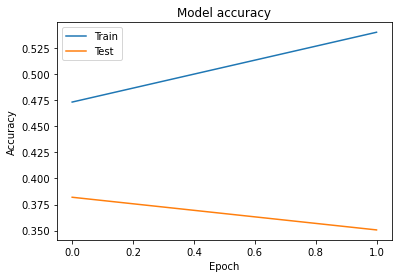

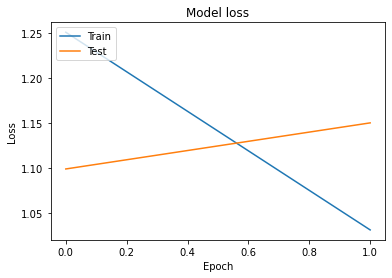

In [18]:
graph()